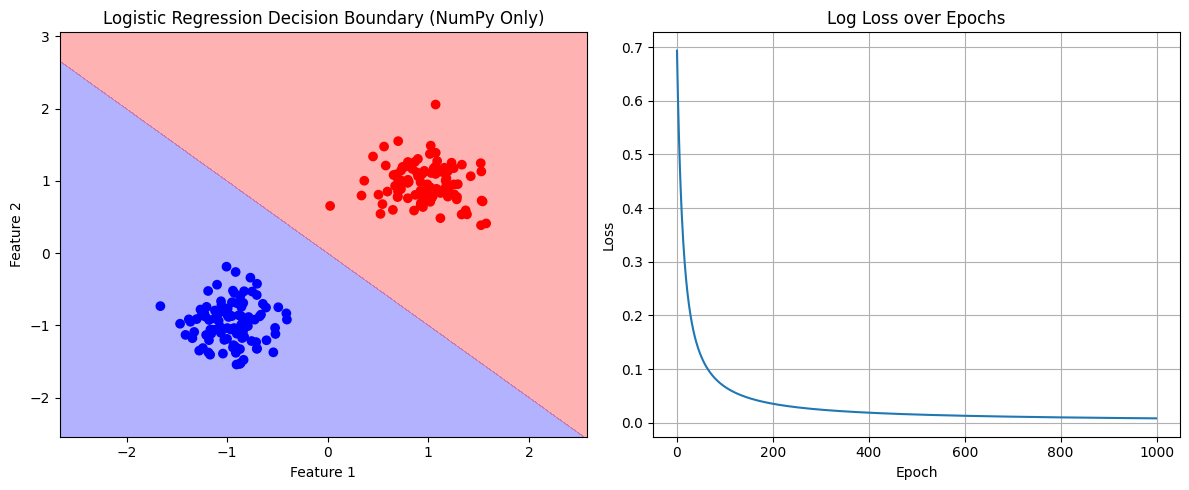

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic binary classification dataset using numpy only
np.random.seed(42)
n_samples = 200
X_class0 = np.random.randn(n_samples // 2, 2) * 0.6 + np.array([-2, -2])
X_class1 = np.random.randn(n_samples // 2, 2) * 0.6 + np.array([2, 2])
X = np.vstack([X_class0, X_class1])
y = np.array([0] * (n_samples // 2) + [1] * (n_samples // 2)).reshape(-1, 1)

# Normalize features
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_norm = (X - X_mean) / X_std

# Add bias term
X_aug = np.hstack([X_norm, np.ones((X.shape[0], 1))])  # shape: (n, d+1)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Hyperparameters
lr = 0.1
epochs = 1000
n_samples, n_features = X_aug.shape
w = np.zeros((n_features, 1))
loss_history = []

# Training loop
for epoch in range(epochs):
    z = X_aug @ w
    y_hat = sigmoid(z)
    error = y_hat - y

    # Log loss
    loss = -np.mean(y * np.log(y_hat + 1e-8) + (1 - y) * np.log(1 - y_hat + 1e-8))
    loss_history.append(loss)

    # Gradient update
    grad = (X_aug.T @ error) / n_samples
    w -= lr * grad

# Visualization
w_final = w.flatten()
xx, yy = np.meshgrid(np.linspace(X_norm[:, 0].min() - 1, X_norm[:, 0].max() + 1, 300),
                     np.linspace(X_norm[:, 1].min() - 1, X_norm[:, 1].max() + 1, 300))
grid = np.c_[xx.ravel(), yy.ravel(), np.ones(xx.size)]
probs = sigmoid(grid @ w).reshape(xx.shape)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.3, colors=["blue", "red"])
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=y.ravel(), cmap='bwr')
plt.title("Logistic Regression Decision Boundary (NumPy Only)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(1, 2, 2)
plt.plot(loss_history)
plt.title("Log Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.tight_layout()
plt.show()


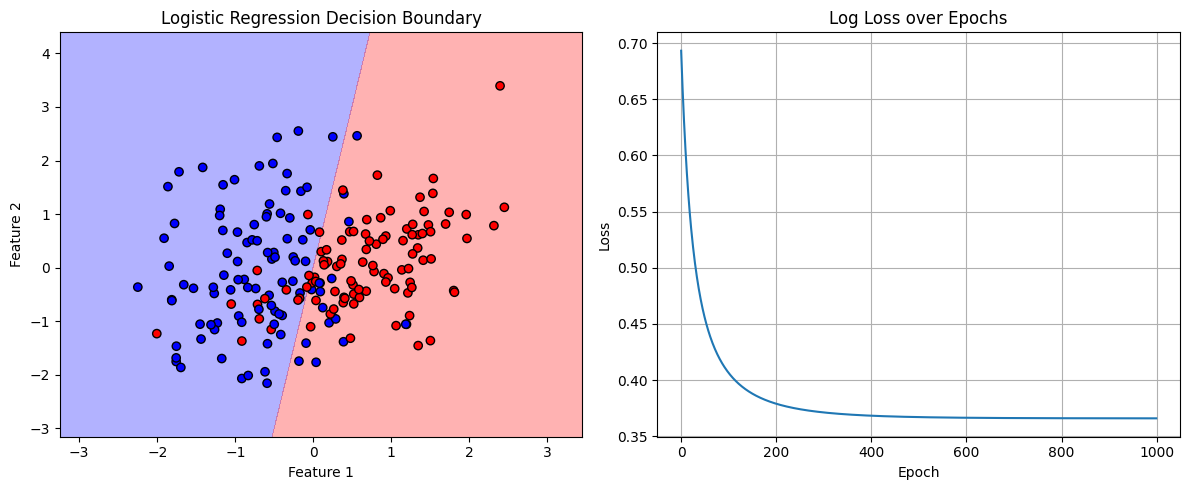

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Generate a synthetic binary classification dataset
X_raw, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                                n_clusters_per_class=1, random_state=42)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X_raw)
y = y.reshape(-1, 1)

# Add bias term to X (last column = 1)
X_aug = np.hstack([X, np.ones((X.shape[0], 1))])  # X shape: (n, d+1)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Hyperparameters
lr = 0.1
epochs = 1000
n_samples, n_features = X_aug.shape
w = np.zeros((n_features, 1))

loss_history = []

# Training loop
for epoch in range(epochs):
    z = X_aug @ w
    y_hat = sigmoid(z)
    error = y_hat - y

    # Loss (log loss)
    loss = -np.mean(y * np.log(y_hat + 1e-8) + (1 - y) * np.log(1 - y_hat + 1e-8))
    loss_history.append(loss)

    # Gradient descent update
    grad = (X_aug.T @ error) / n_samples
    w -= lr * grad

# Final weights
w_final = w.flatten()

# Create mesh for decision boundary visualization
xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 300),
                     np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 300))
grid = np.c_[xx.ravel(), yy.ravel(), np.ones(xx.size)]
probs = sigmoid(grid @ w).reshape(xx.shape)

# Plot decision boundary and loss curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.3, colors=["blue", "red"])
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='bwr', edgecolors='k')
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(1, 2, 2)
plt.plot(loss_history)
plt.title("Log Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.tight_layout()
plt.show()
